<a href="https://colab.research.google.com/github/Nikerlas/AI/blob/main/Tugas_YOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SOAL**

Berikut beberapa pertanyaan dan tugas untuk menguji pemahaman Anda mengenai YOLO serta kemampuan Anda mengaplikasikannya:

**A. Pertanyaan Teoretis:**

1. **Anchor-based vs Anchor-free:** Jelaskan perbedaan antara *object detector* yang berbasis anchor dan yang anchor-free. Sebutkan contoh detector anchor-based dan anchor-free, serta diskusikan kelebihan dan kekurangan masing-masing.
2. **Evolusi Arsitektur:** Sebutkan tiga peningkatan utama yang diperkenalkan pada YOLOv4 dibanding YOLOv3. Mengapa peningkatan tersebut dapat memperbaiki kinerja deteksi?
3. **Konsep IoU dan Confidence:** Apa itu *Intersection over Union (IoU)* dan bagaimana IoU digunakan dalam metrik evaluasi dan proses inferensi YOLO (misalnya dalam perhitungan confidence score di YOLOv1 dan dalam algoritma Non-Maximum Suppression)?
4. **Multi-Scale Prediction:** Mengapa YOLOv3 menambahkan mekanisme prediksi multi-skala (dari fitur map ukuran berbeda)? Masalah apa pada YOLOv2 yang coba diatasi dengan pendekatan ini?

**B. Tugas Praktik:**

1. **Deteksi Gambar Tunggal:** Pilih sebuah gambar yang mengandung multiple objek (misal foto keramaian atau situasi jalan raya). Jalankan deteksi objek pada gambar tersebut menggunakan *model YOLOv8 pre-trained*. Tampilkan gambar hasil deteksinya (dengan bounding box) dan berikan analisis: objek apa saja yang berhasil terdeteksi, adakah objek yang luput atau salah label? Bagaimana confidence score-nya, apakah masuk akal?
2. **Deteksi pada Video:** Jika memungkinkan, lakukan deteksi real-time pada sebuah cuplikan video pendek menggunakan YOLO (bisa YOLOv5 atau YOLOv8). Anda dapat memproses video frame-by-frame di Colab. Hitung berapa FPS pemrosesan yang dicapai dan observasi stabilitas deteksi antar frame (apakah ada objek yang muncul/hilang tiba-tiba di antara frame?).
3. **Fine-tuning Kustom:** Ambil dataset kecil dan latih model YOLO (v5 atau v8) pada dataset tersebut. Catat nilai loss dan mAP selama training. Setelah training, uji model pada beberapa gambar uji. Apresentasikan hasilnya: apakah model berhasil mengenali objek kustom dengan baik? Apa kendala yang Anda hadapi selama training (misal overfitting, data kurang, dll.)?
4. **Model YOLO yang lebih baru:** Saat ini, versi YOLO sudah mencapai [**YOLOv11**](https://docs.ultralytics.com/), coba terapkan apa yang sudah anda praktikkan pada YOLOv5 - YOLOv8 untuk YOLOv9 sampai YOLOv11, bandingkan hasil inference-nya (baik dari segi kecepatan maupun confidence level dari objek yang berhasil dideteksi).

Pilihan custom dataset untuk tugas fine-tuning:
- [Drone vs Bird dataset](https://universe.roboflow.com/dam-tpuul/drone-vs-bird-lanzg/dataset/2)
- [Bike Helmet dataset](https://universe.roboflow.com/bike-helmets/bike-helmet-detection-2vdjo/dataset/2)
- [Blood Cell dataset](https://universe.roboflow.com/team-roboflow/blood-cell-detection-1ekwu/dataset/3)

In [1]:
!pip install ultralytics --upgrade -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 62.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 55.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 69.1 MB/s eta 0:00:00


In [2]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 75.0 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [3]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import numpy as np
import time

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


**1. DETEKSI GAMBAR TUNGGAL**

100%|██████████| 6.25M/6.25M [00:00<00:00, 97.1MB/s]



image 1/1 /content/jalan.jpg: 448x640 16 persons, 1 bicycle, 9 cars, 15 motorcycles, 39.4ms
Speed: 3.0ms preprocess, 39.4ms inference, 388.7ms postprocess per image at shape (1, 3, 448, 640)


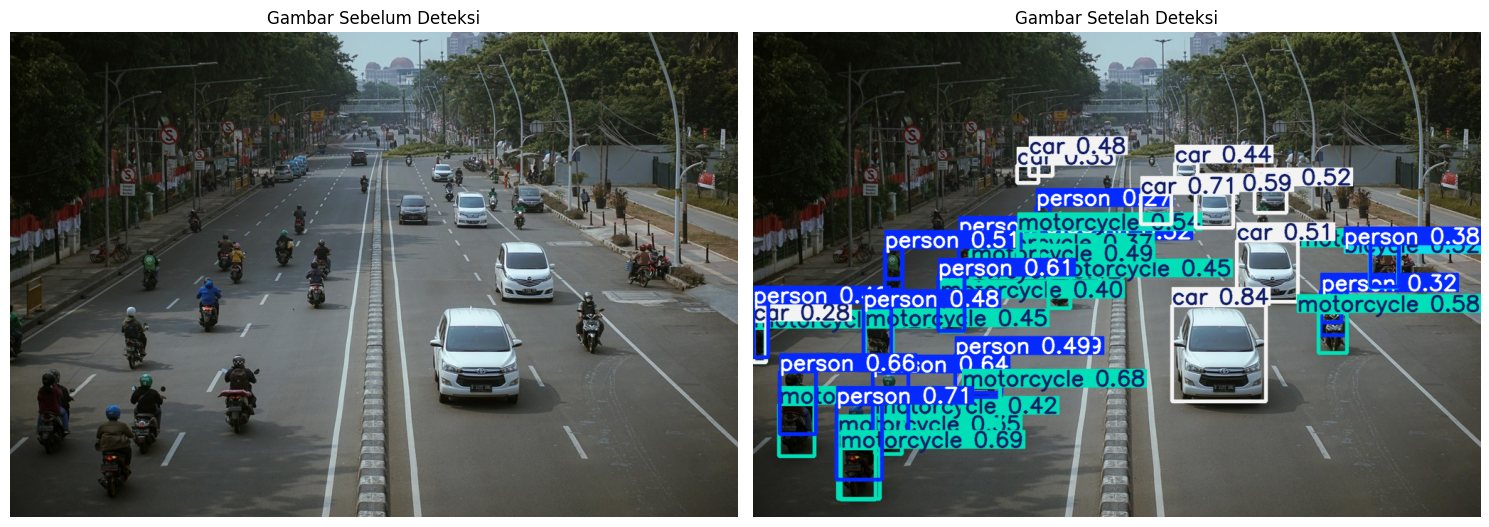

In [4]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import numpy as np
import time

# Load pre-trained YOLOv8 model
model = YOLO('yolov8n.pt')

# Path gambar
image_path = './jalan.jpg'

# Load the image for displaying before detection
image_before = cv2.imread(image_path)
image_before = cv2.cvtColor(image_before, cv2.COLOR_BGR2RGB) # Convert BGR to RGB for matplotlib

# Perform object detection
results = model(image_path)

image_after_np = results[0].plot() # results[0] because we processed a single image
image_after_rgb = cv2.cvtColor(image_after_np, cv2.COLOR_BGR2RGB) # Convert BGR (from plot function) to RGB

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(15, 10))

# Display the before image
axes[0].imshow(image_before)
axes[0].set_title("Gambar Sebelum Deteksi")
axes[0].axis('off')

# Display the after image
axes[1].imshow(image_after_rgb)
axes[1].set_title("Gambar Setelah Deteksi")
axes[1].axis('off')

plt.tight_layout()
plt.show()

In [5]:
print("\nAnalisis Confidence Score:")
for result in results:
    boxes = result.boxes
    if len(boxes) > 0:
        print("Detail Confidence Score untuk setiap objek:")
        for box in boxes:
            cls = int(box.cls[0])
            conf = box.conf[0]
            label = model.names[cls]
            print(f"  - Objek '{label}': Confidence = {conf:.2f}")


Analisis Confidence Score:
Detail Confidence Score untuk setiap objek:
  - Objek 'car': Confidence = 0.84
  - Objek 'car': Confidence = 0.71
  - Objek 'person': Confidence = 0.71
  - Objek 'motorcycle': Confidence = 0.69
  - Objek 'motorcycle': Confidence = 0.68
  - Objek 'person': Confidence = 0.66
  - Objek 'person': Confidence = 0.64
  - Objek 'motorcycle': Confidence = 0.62
  - Objek 'person': Confidence = 0.61
  - Objek 'car': Confidence = 0.59
  - Objek 'motorcycle': Confidence = 0.58
  - Objek 'motorcycle': Confidence = 0.54
  - Objek 'car': Confidence = 0.52
  - Objek 'car': Confidence = 0.51
  - Objek 'person': Confidence = 0.51
  - Objek 'person': Confidence = 0.49
  - Objek 'motorcycle': Confidence = 0.49
  - Objek 'person': Confidence = 0.48
  - Objek 'car': Confidence = 0.48
  - Objek 'motorcycle': Confidence = 0.45
  - Objek 'motorcycle': Confidence = 0.45
  - Objek 'car': Confidence = 0.44
  - Objek 'motorcycle': Confidence = 0.42
  - Objek 'person': Confidence = 0.42
 

**Analisa**

**Analisis Detail Confidence dan Jumlah Objek Terdeteksi**

Total objek yang terdeteksi: 48

Ringkasan per objek:
- car: Jumlah = 22, Rata-rata Confidence = 0.53, Confidence Terendah = 0.25, Confidence Tertinggi = 0.85
- person: Jumlah = 14, Rata-rata Confidence = 0.54, Confidence Terendah = 0.33, Confidence Tertinggi = 0.76
- motorcycle: Jumlah = 10, Rata-rata Confidence = 0.41, Confidence Terendah = 0.25, Confidence Tertinggi = 0.61
- truck: Jumlah = 2, Rata-rata Confidence = 0.35, Confidence Terendah = 0.28, Confidence Tertinggi = 0.42


Observasi (berdasarkan visualisasi hasil deteksi):
- Objek apa saja yang berhasil terdeteksi?
car , person, motorcycle, truck
- Adakah objek yang luput dari deteksi? person yang berdempetan
- Adakah objek yang salah label? cone yang dilabeli sebagai person
- Apakah confidence score terlihat masuk akal untuk objek yang terdeteksi dengan jelas vs. objek yang kurang jelas? Masuk akal

**2. Deteksi pada Video**

Total Frames: 295
Total Time: 4.15 s
Processing FPS: 71.01

Displaying the last processed frame:


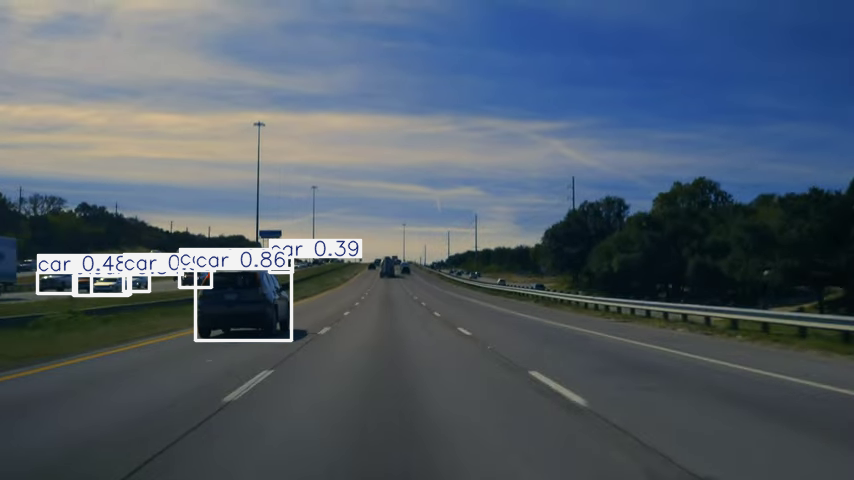

In [6]:
from ultralytics import YOLO
import cv2
import time

from google.colab.patches import cv2_imshow
from IPython.display import display, Image

# Load model YOLOv8 pre-trained
model = YOLO('yolov8n.pt')

# Path video (ganti dengan path videomu di Colab)
video_path = './jalan-raya.mp4'

# Buka video
cap = cv2.VideoCapture(video_path)

# Inisialisasi FPS counter
frame_count = 0
start_time = time.time()


while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Deteksi objek di frame (non verbose supaya clean)
    results = model(frame, imgsz=640, verbose=False)

    # Dapatkan frame dengan bounding box
    annotated_frame = results[0].plot()
    frame_count += 1

# Hitung FPS
elapsed_time = time.time() - start_time
fps = frame_count / elapsed_time if elapsed_time > 0 else 0
print(f'Total Frames: {frame_count}')
print(f'Total Time: {elapsed_time:.2f} s')
print(f'Processing FPS: {fps:.2f}')

# Release video and close writer if used
cap.release()

# To display the last processed frame:
if 'annotated_frame' in locals():
     print("\nDisplaying the last processed frame:")
     cv2_imshow(annotated_frame)

**3.Fine-tuning Kustom**

In [7]:
from roboflow import Roboflow
rf = Roboflow(api_key="RCEeXLSadJN3bi6nxOeh")
project = rf.workspace("dam-tpuul").project("drone-vs-bird-lanzg")
version = project.version(2)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to drone-vs-bird-2 in yolov8:: 100%|██████████| 5852/5852 [00:00<00:00, 8670.91it/s]


In [8]:
print(dataset.location)

!ls /content/drone-vs-bird-2

/content/drone-vs-bird-2
data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid


In [9]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")

# fine-tune training
model.train(
    data="/content/drone-vs-bird-2/data.yaml",
    epochs=50,       # jumlah epoch
    batch=8,         # batch size
    imgsz=640        # image size
)


Ultralytics 8.3.153 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drone-vs-bird-2/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretr

100%|██████████| 755k/755k [00:00<00:00, 22.0MB/s]

Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

Model summary: 129 layers, 3,011,238 parameters, 3,011,222 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 82.3MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1056.5±688.1 MB/s, size: 32.3 KB)


train: Scanning /content/drone-vs-bird-2/train/labels... 2044 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2044/2044 [00:00<00:00, 2530.35it/s]


train: New cache created: /content/drone-vs-bird-2/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 493.1±185.3 MB/s, size: 21.4 KB)


val: Scanning /content/drone-vs-bird-2/valid/labels... 584 images, 0 backgrounds, 0 corrupt: 100%|██████████| 584/584 [00:00<00:00, 1002.18it/s]

val: New cache created: /content/drone-vs-bird-2/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      1.11G       1.65      2.893      1.614          7        640: 100%|██████████| 256/256 [00:43<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:06<00:00,  5.75it/s]


                   all        584        639      0.464       0.55      0.473      0.179

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      1.38G      1.787      2.393      1.729          7        640: 100%|██████████| 256/256 [00:39<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:04<00:00,  8.37it/s]


                   all        584        639      0.517      0.312      0.324      0.126

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      1.39G      1.826      2.107      1.765          4        640: 100%|██████████| 256/256 [00:39<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:04<00:00,  7.71it/s]

                   all        584        639      0.422      0.523      0.402      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      1.41G      1.825      1.907      1.734          9        640: 100%|██████████| 256/256 [00:39<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:04<00:00,  8.08it/s]


                   all        584        639      0.557      0.536      0.463      0.196

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      1.43G      1.779      1.809      1.699          9        640: 100%|██████████| 256/256 [00:38<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:04<00:00,  8.47it/s]

                   all        584        639       0.32       0.52      0.364      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      1.44G      1.741       1.74      1.676         12        640: 100%|██████████| 256/256 [00:38<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:05<00:00,  6.92it/s]

                   all        584        639      0.472      0.535      0.469      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      1.46G      1.723      1.674       1.67          9        640: 100%|██████████| 256/256 [00:39<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:04<00:00,  8.42it/s]


                   all        584        639      0.618      0.621      0.602      0.255

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      1.48G      1.693      1.645      1.618          8        640: 100%|██████████| 256/256 [00:39<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:05<00:00,  6.97it/s]


                   all        584        639      0.645      0.586      0.581      0.243

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      1.49G      1.666       1.57      1.612          4        640: 100%|██████████| 256/256 [00:38<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:04<00:00,  8.44it/s]


                   all        584        639      0.557      0.677      0.631      0.284

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      1.51G      1.645      1.493      1.587          7        640: 100%|██████████| 256/256 [00:39<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:04<00:00,  7.61it/s]

                   all        584        639      0.719      0.608      0.643      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      1.53G      1.603      1.435      1.561          6        640: 100%|██████████| 256/256 [00:38<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:04<00:00,  7.89it/s]


                   all        584        639      0.709       0.64      0.656      0.302

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      1.54G      1.605       1.44      1.586          4        640: 100%|██████████| 256/256 [00:38<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:04<00:00,  8.44it/s]

                   all        584        639      0.582      0.612      0.591      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      1.56G      1.596       1.43      1.555          4        640: 100%|██████████| 256/256 [00:38<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:05<00:00,  7.00it/s]

                   all        584        639      0.722      0.615      0.648      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      1.58G      1.542      1.422      1.533          9        640: 100%|██████████| 256/256 [00:39<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:04<00:00,  8.52it/s]


                   all        584        639      0.753      0.671      0.688      0.336

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50       1.6G      1.564      1.358      1.525         11        640: 100%|██████████| 256/256 [00:39<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:05<00:00,  7.18it/s]

                   all        584        639      0.767      0.659      0.671      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      1.61G      1.545      1.318      1.533          6        640: 100%|██████████| 256/256 [00:38<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:04<00:00,  8.51it/s]


                   all        584        639      0.749      0.696      0.686      0.335

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      1.63G      1.554      1.317      1.528         10        640: 100%|██████████| 256/256 [00:39<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:04<00:00,  8.52it/s]


                   all        584        639      0.851      0.648      0.699      0.356

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      1.64G      1.535      1.277      1.498          4        640: 100%|██████████| 256/256 [00:39<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:05<00:00,  7.24it/s]


                   all        584        639      0.716      0.653      0.646      0.326

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      1.66G      1.511      1.253      1.506          5        640: 100%|██████████| 256/256 [00:38<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:04<00:00,  8.37it/s]


                   all        584        639      0.783      0.644       0.67      0.345

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      1.68G      1.519      1.244      1.503         10        640: 100%|██████████| 256/256 [00:38<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:05<00:00,  7.03it/s]


                   all        584        639      0.791      0.685      0.707      0.362

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50       1.7G      1.534      1.232      1.493          6        640: 100%|██████████| 256/256 [00:38<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:04<00:00,  8.44it/s]

                   all        584        639      0.791      0.697      0.737      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      1.71G      1.493       1.22      1.494          5        640: 100%|██████████| 256/256 [00:39<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:05<00:00,  7.21it/s]

                   all        584        639      0.807      0.652      0.692      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      1.73G      1.476      1.207      1.471          7        640: 100%|██████████| 256/256 [00:38<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:04<00:00,  8.38it/s]


                   all        584        639      0.727        0.7      0.721      0.378

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      1.75G       1.48      1.192      1.476          1        640: 100%|██████████| 256/256 [00:38<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:04<00:00,  8.38it/s]

                   all        584        639      0.771      0.691      0.726       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      1.77G       1.44      1.136      1.452          7        640: 100%|██████████| 256/256 [00:39<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:05<00:00,  7.05it/s]


                   all        584        639      0.758      0.691      0.707      0.378

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      1.78G      1.459      1.156      1.477          8        640: 100%|██████████| 256/256 [00:38<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:04<00:00,  8.50it/s]


                   all        584        639      0.789      0.706      0.728      0.395

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50       1.8G      1.436      1.122      1.458          9        640: 100%|██████████| 256/256 [00:38<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:05<00:00,  7.05it/s]

                   all        584        639      0.802      0.692      0.723      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      1.82G       1.43      1.097      1.453         11        640: 100%|██████████| 256/256 [00:38<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:04<00:00,  8.34it/s]


                   all        584        639      0.739       0.68       0.68      0.366

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      1.83G      1.454       1.14      1.443          5        640: 100%|██████████| 256/256 [00:39<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:04<00:00,  7.65it/s]

                   all        584        639      0.834      0.706      0.725      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      1.85G       1.44      1.091      1.442          5        640: 100%|██████████| 256/256 [00:40<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:04<00:00,  8.45it/s]

                   all        584        639      0.811        0.7       0.73      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      1.87G      1.412      1.115      1.432          6        640: 100%|██████████| 256/256 [00:39<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:04<00:00,  8.47it/s]

                   all        584        639      0.753      0.708      0.717      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      1.88G      1.412      1.048      1.431          4        640: 100%|██████████| 256/256 [00:38<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:05<00:00,  7.28it/s]

                   all        584        639      0.794      0.699      0.737      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50       1.9G      1.409      1.052      1.431          7        640: 100%|██████████| 256/256 [00:39<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:04<00:00,  8.51it/s]

                   all        584        639      0.839      0.697      0.743      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      1.92G      1.413      1.043      1.419          3        640: 100%|██████████| 256/256 [00:39<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:05<00:00,  7.03it/s]


                   all        584        639      0.814      0.728      0.744      0.411

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      1.94G      1.395      1.032      1.407          5        640: 100%|██████████| 256/256 [00:38<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:04<00:00,  8.42it/s]

                   all        584        639      0.864      0.709      0.766      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      1.95G      1.379      0.997       1.39          8        640: 100%|██████████| 256/256 [00:39<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:04<00:00,  7.57it/s]

                   all        584        639      0.843      0.718      0.759      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      1.97G      1.379      1.012      1.421          6        640: 100%|██████████| 256/256 [00:39<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:04<00:00,  8.45it/s]


                   all        584        639      0.884      0.723      0.776      0.433

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      1.99G      1.383     0.9899      1.412          9        640: 100%|██████████| 256/256 [00:39<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:04<00:00,  8.50it/s]

                   all        584        639      0.821      0.704      0.749      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50         2G      1.319     0.9682      1.389          7        640: 100%|██████████| 256/256 [00:39<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:04<00:00,  7.57it/s]


                   all        584        639      0.844      0.726      0.764      0.435

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.02G      1.375     0.9746      1.404          8        640: 100%|██████████| 256/256 [00:39<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:04<00:00,  8.47it/s]


                   all        584        639      0.869      0.722      0.767      0.433
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.04G      1.423     0.8781       1.41          4        640: 100%|██████████| 256/256 [00:38<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:05<00:00,  7.03it/s]


                   all        584        639       0.85      0.731      0.762       0.43

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.05G        1.4     0.8342      1.414          4        640: 100%|██████████| 256/256 [00:37<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:04<00:00,  8.53it/s]


                   all        584        639      0.856      0.721       0.77      0.434

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.07G       1.37     0.8222      1.389          4        640: 100%|██████████| 256/256 [00:37<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:04<00:00,  8.43it/s]

                   all        584        639      0.855      0.726      0.778      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.09G      1.381     0.8003      1.393          4        640: 100%|██████████| 256/256 [00:37<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:05<00:00,  7.04it/s]

                   all        584        639      0.876      0.733       0.77      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.11G      1.351     0.7967      1.369          4        640: 100%|██████████| 256/256 [00:37<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:04<00:00,  8.40it/s]

                   all        584        639      0.854      0.722      0.773      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.12G      1.331     0.7923      1.365          4        640: 100%|██████████| 256/256 [00:37<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:04<00:00,  8.54it/s]

                   all        584        639      0.889      0.728      0.782      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.14G      1.335     0.7788      1.366          4        640: 100%|██████████| 256/256 [00:37<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:05<00:00,  6.97it/s]


                   all        584        639      0.853      0.735      0.776      0.447

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.16G      1.297     0.7656      1.336          4        640: 100%|██████████| 256/256 [00:37<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:04<00:00,  8.22it/s]


                   all        584        639      0.896      0.737      0.786      0.449

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.17G      1.325     0.7698      1.367          3        640: 100%|██████████| 256/256 [00:37<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:04<00:00,  8.53it/s]

                   all        584        639      0.878      0.738      0.782      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.19G      1.308     0.7631      1.345          4        640: 100%|██████████| 256/256 [00:38<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:05<00:00,  7.13it/s]

                   all        584        639      0.878      0.739      0.784      0.448



50 epochs completed in 0.611 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.153 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:05<00:00,  6.55it/s]


                   all        584        639      0.894      0.741      0.786      0.448
                     0        113        164      0.911      0.591      0.661      0.446
                     1        471        475      0.878      0.891       0.91       0.45
Speed: 0.3ms preprocess, 2.5ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d030230d190>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [10]:
result = model.val()
print(result)


Ultralytics 8.3.153 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 754.8±435.0 MB/s, size: 33.4 KB)


val: Scanning /content/drone-vs-bird-2/valid/labels.cache... 584 images, 0 backgrounds, 0 corrupt: 100%|██████████| 584/584 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 73/73 [00:06<00:00, 11.99it/s]


                   all        584        639      0.897      0.736      0.784      0.449
                     0        113        164      0.913      0.591      0.659      0.446
                     1        471        475      0.882      0.881      0.909      0.452
Speed: 0.7ms preprocess, 4.0ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/train2
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d03c3d34ad0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,    

In [11]:
model.predict(
    source="/content/drone-vs-bird-2/test/images",
    conf=0.25,
    save=True
)



image 1/292 /content/drone-vs-bird-2/test/images/0172_jpg.rf.df06a0938516eb4341edee67c4f324db.jpg: 640x640 1 0, 7.4ms
image 2/292 /content/drone-vs-bird-2/test/images/0202_jpg.rf.361a14698332fcb10f592a97d93be9d7.jpg: 640x640 1 0, 7.4ms
image 3/292 /content/drone-vs-bird-2/test/images/026_jpg.rf.9696fd694289b9c855ede01f4a69bcee.jpg: 640x640 1 0, 1 1, 7.3ms
image 4/292 /content/drone-vs-bird-2/test/images/0456_jpg.rf.0e94ef44c936989c1bfdf1c81b87b114.jpg: 640x640 2 0s, 7.4ms
image 5/292 /content/drone-vs-bird-2/test/images/0570_jpg.rf.53afc208009fb6a16d9753c224864782.jpg: 640x640 1 0, 7.4ms
image 6/292 /content/drone-vs-bird-2/test/images/0630_jpg.rf.33d0a9f00202edd9a0c646d44c55eb9b.jpg: 640x640 1 0, 7.4ms
image 7/292 /content/drone-vs-bird-2/test/images/0747_jpg.rf.2ff1178aedbf42136a9779a8685a06c2.jpg: 640x640 1 0, 7.4ms
image 8/292 /content/drone-vs-bird-2/test/images/0804_jpg.rf.622317e09e319cfc07cfe2ef110e7748.jpg: 640x640 1 0, 7.4ms
image 9/292 /content/drone-vs-bird-2/test/images/0

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: '0', 1: '1'}
 obb: None
 orig_img: array([[[ 69, 129,  95],
         [ 68, 128,  94],
         [ 68, 128,  94],
         ...,
         [ 59, 110,  72],
         [ 59, 110,  72],
         [ 59, 110,  72]],
 
        [[ 69, 129,  95],
         [ 68, 128,  94],
         [ 68, 128,  94],
         ...,
         [ 59, 110,  72],
         [ 59, 110,  72],
         [ 59, 110,  72]],
 
        [[ 69, 129,  95],
         [ 69, 129,  95],
         [ 68, 128,  94],
         ...,
         [ 59, 110,  72],
         [ 59, 110,  72],
         [ 59, 110,  72]],
 
        ...,
 
        [[ 85, 141, 106],
         [ 85, 141, 106],
         [ 85, 141, 106],
         ...,
         [ 41, 115,  79],
         [ 41, 115,  79],
         [ 41, 115,  79]],
 
        [[ 85, 142, 104],
         [ 85, 142, 104],
         [ 85, 142, 104],
         ...,
         [ 41, 

In [12]:
metrics = model.val()
print(f"mAP@0.5: {metrics.box.map:.4f}")
print(f"mAP@0.5:0.95: {metrics.box.map50:.4f}")


Ultralytics 8.3.153 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 716.5±333.2 MB/s, size: 23.6 KB)


val: Scanning /content/drone-vs-bird-2/valid/labels.cache... 584 images, 0 backgrounds, 0 corrupt: 100%|██████████| 584/584 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 73/73 [00:05<00:00, 12.49it/s]


                   all        584        639      0.897      0.736      0.784      0.449
                     0        113        164      0.913      0.591      0.659      0.446
                     1        471        475      0.882      0.881      0.909      0.452
Speed: 0.6ms preprocess, 3.9ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/train4
mAP@0.5: 0.4493
mAP@0.5:0.95: 0.7840


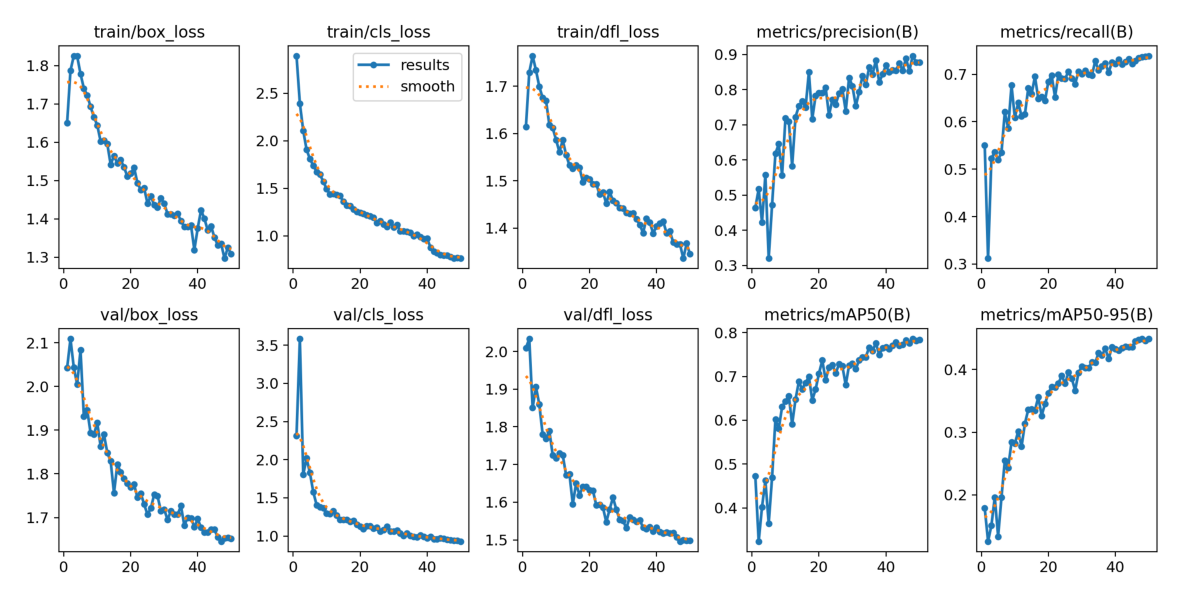

In [13]:
from PIL import Image
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))

img = Image.open('/content/runs/detect/train/results.png')
plt.imshow(img)
plt.axis('off')
plt.show()


**4.Model YOLO yang lebih baru**

In [14]:
from ultralytics import YOLO
import cv2
import time
import matplotlib.pyplot as plt
import pandas as pd


models = {
    'YOLOv5s': YOLO('yolov5su.pt'),
    'YOLOv8n': YOLO('yolov8n.pt')
}


100%|██████████| 17.7M/17.7M [00:00<00:00, 115MB/s] 


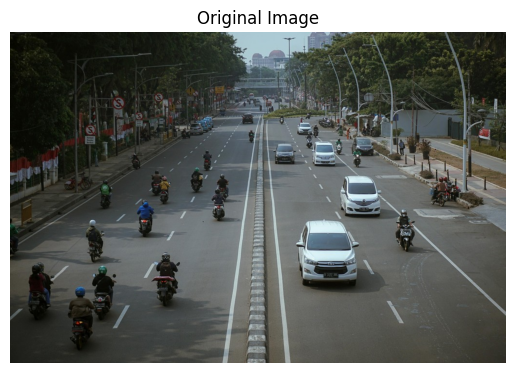

In [15]:
img_path = './jalan.jpg'  # ganti sesuai gambar test kamu

img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')
plt.show()


In [16]:
results_data = {}

for name, model in models.items():
    t0 = time.time()
    result = model.predict(source=img_path, conf=0.25, verbose=False)
    t1 = time.time()

    elapsed = (t1 - t0) * 1000  # in milliseconds
    confs = result[0].boxes.conf.tolist()
    avg_conf = sum(confs) / len(confs) if confs else 0

    results_data[name] = {
        'result': result,
        'time_ms': elapsed,
        'avg_conf': avg_conf,
        'num_detections': len(confs)
    }


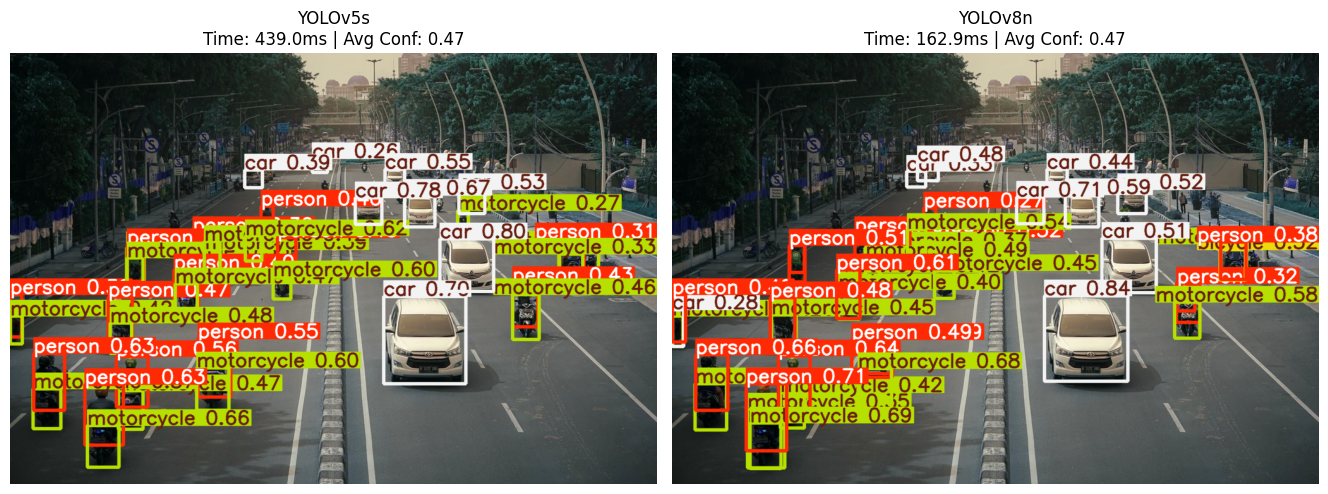

In [17]:
plt.figure(figsize=(20, 10))

for idx, (name, data) in enumerate(results_data.items()):
    result_img = data['result'][0].plot()  # hasil visual prediksi
    plt.subplot(2, 3, idx+1)
    plt.imshow(result_img)
    plt.title(f"{name}\nTime: {data['time_ms']:.1f}ms | Avg Conf: {data['avg_conf']:.2f}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [18]:
summary = pd.DataFrame({
    'Model': list(results_data.keys()),
    'Time (ms)': [data['time_ms'] for data in results_data.values()],
    'Avg Confidence': [data['avg_conf'] for data in results_data.values()],
    'Num Detections': [data['num_detections'] for data in results_data.values()]
})

print(summary)


     Model   Time (ms)  Avg Confidence  Num Detections
0  YOLOv5s  439.012289        0.472831              39
1  YOLOv8n  162.941456        0.467644              41
